In [3]:
import os
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Pyspark Tutorial").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/21 11:38:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
df = spark.read.csv('data-2.csv',header=True,escape="\"")

In [5]:
df.show(5, 0)

+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/2010 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/2010 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------

In [6]:
df.count()

541909

In [7]:
df.select('CustomerID').distinct().count()

4373

In [8]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+---------------+-------------+
|        Country|country_count|
+---------------+-------------+
| United Kingdom|         3950|
|        Germany|           95|
|         France|           87|
|          Spain|           31|
|        Belgium|           25|
|    Switzerland|           21|
|       Portugal|           19|
|          Italy|           15|
|        Finland|           12|
|        Austria|           11|
|         Norway|           10|
|        Denmark|            9|
|Channel Islands|            9|
|      Australia|            9|
|    Netherlands|            9|
|         Sweden|            8|
|         Cyprus|            8|
|          Japan|            8|
|         Poland|            6|
|         Greece|            4|
+---------------+-------------+
only showing top 20 rows



In [9]:
df.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'string'),
 ('InvoiceDate', 'string'),
 ('UnitPrice', 'string'),
 ('CustomerID', 'string'),
 ('Country', 'string')]

In [10]:
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")
df = df.withColumn('date', to_timestamp("InvoiceDate", 'MM/dd/yyyy HH:mm'))

In [11]:
df.show(5, False)

+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|CustomerID|Country       |date               |
+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+-------------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/2010 8:26|2.55     |17850     |United Kingdom|2010-12-01 08:26:00|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|2010-12-01 08:26:00|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/2010 8:26|2.75     |17850     |United Kingdom|2010-12-01 08:26:00|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|2010-12-01 08:26:00|
|536365   |84029E   |RED WOOLLY HO

In [12]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)



In [13]:
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2011-12-09 12:50:00|
+-------------------+



In [14]:
df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|2010-12-01 08:26:00|
+-------------------+



In [15]:
df = df.withColumn("from_date", lit("12/1/10 08:26"))
df = df.withColumn('from_date',to_timestamp("from_date", 'MM/dd/yy HH:mm'))

df2 = df.withColumn('from_date',to_timestamp(col('from_date'))).withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))

In [16]:
df2.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- recency: long (nullable = true)



In [17]:
df2.show(10, 0)

+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|CustomerID|Country       |date               |from_date          |recency|
+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/2010 8:26|2.55     |17850     |United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|0      |
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|0      |
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/2010 8:26|2.75     |17850     |United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|0      |
|536

In [18]:
df2.groupBy('CustomerID').agg(max('recency').alias('recency')).show()

+----------+--------+
|CustomerID| recency|
+----------+--------+
|     16250| 9700860|
|     15574|16943700|
|     15555|31218780|
|     15271|31643100|
|     17757|32166300|
|     17551| 1230360|
|     13187| 3148260|
|     16549|31387200|
|     14525|31537620|
|     18283|31980960|
|     13107|28445160|
|     16303|30075780|
|     13174|30866940|
|     13027|22464780|
|     12957|31910760|
|     17128| 3382560|
|     14810|28781580|
|     16654|20066220|
|     17491|32169120|
|     17917|28353240|
+----------+--------+
only showing top 20 rows



In [19]:
df2.where((df2.CustomerID == '17551') & (df2.recency == '1230360')).show()

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|recency|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+-------------------+-------+
|   539019|   46000P|POLYESTER FILLER ...|       4|12/15/2010 14:12|     4.25|     17551|United Kingdom|2010-12-15 14:12:00|2010-12-01 08:26:00|1230360|
|   539019|   82494L|WOODEN FRAME ANTI...|       1|12/15/2010 14:12|     2.95|     17551|United Kingdom|2010-12-15 14:12:00|2010-12-01 08:26:00|1230360|
|   539019|    21232|STRAWBERRY CERAMI...|       1|12/15/2010 14:12|     1.25|     17551|United Kingdom|2010-12-15 14:12:00|2010-12-01 08:26:00|1230360|
|   539019|    22693|GROW A FLYTRAP OR...|      24|12/15/2010 14:12|     1.25|    

In [20]:
df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')), on='recency', how='leftsemi')

In [21]:
df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))

In [22]:
df_freq.show(5, 0)

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|17551     |43       |
|13187     |37       |
|17128     |14       |
|18106     |39       |
|17855     |17       |
+----------+---------+
only showing top 5 rows



In [23]:
df3 = df2.join(df_freq, on='CustomerID', how='inner')

In [24]:
df3.show(5, 0)

+----------+-------+---------+---------+-----------------------------------+--------+--------------+---------+--------------+-------------------+-------------------+---------+
|CustomerID|recency|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|Country       |date               |from_date          |frequency|
+----------+-------+---------+---------+-----------------------------------+--------+--------------+---------+--------------+-------------------+-------------------+---------+
|18074     |5220   |536384   |82484    |WOOD BLACK BOARD ANT WHITE FINISH  |3       |12/1/2010 9:53|6.45     |United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|13       |
|18074     |5220   |536384   |84755    |COLOUR GLASS T-LIGHT HOLDER HANGING|48      |12/1/2010 9:53|0.65     |United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|13       |
|18074     |5220   |536384   |22464    |HANGING METAL HEART LANTERN        |12      |12/1/2010 9:53|1.65     |United Kin

In [25]:
m_val = df3.withColumn('TotalAmount', col('Quantity') * col('UnitPrice'))

In [26]:
m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))

In [27]:
final_df = m_val.join(df3, on='CustomerID', how='inner')

In [28]:
final_df.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- monetary_value: double (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)



In [29]:
result = final_df.select(['CustomerID', 'monetary_value', 'recency', 'frequency']).distinct()

In [30]:
result.where(result.CustomerID == '17551').show()

+----------+--------------+-------+---------+
|CustomerID|monetary_value|recency|frequency|
+----------+--------------+-------+---------+
|     17551|        306.84|1230360|       43|
+----------+--------------+-------+---------+



In [62]:
import pandas as pd

df_result = result.toPandas()

In [63]:
df_result.head()

,CustomerID,monetary_value,recency,frequency
0,17551,306.84,1230360,43
1,13187,236.02,3148260,37
2,17128,157.09,3382560,14
3,18106,430.70,3815820,39
4,17855,208.97,91080,17


In [67]:
df_frequency_bar = df_result.groupby(df_result['frequency'])['CustomerID'].count().reset_index()

df_frequency_bar.rename(columns={'CustomerID': 'num_customers'}, inplace=True)

In [68]:
df_frequency_bar.sort_values(by='frequency', ascending=False)

,frequency,num_customers
152,544,2
151,417,13
150,324,8
149,314,2
148,303,2
...,...,...
4,5,171
3,4,166
2,3,171
1,2,246


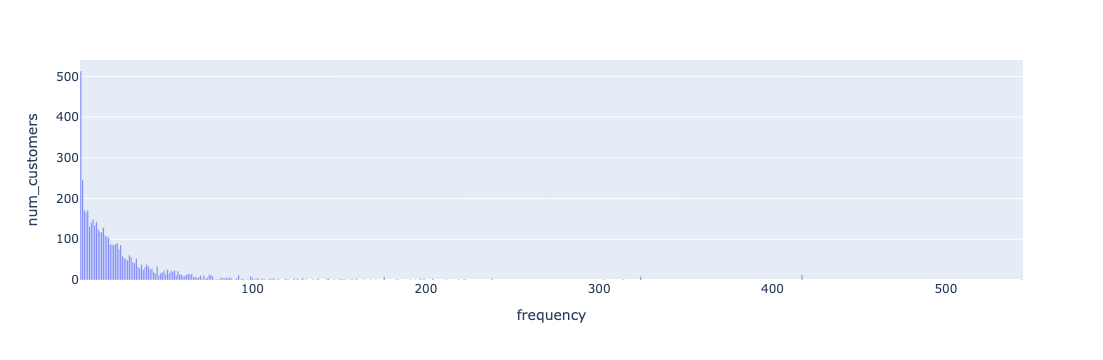

In [69]:
import plotly.express as px

fig = px.bar(df_frequency_bar, x = 'frequency', y = 'num_customers')
fig.show()